In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np 
import pandas as pd

In [3]:
df = pd.read_csv("/content/drive/MyDrive/CTSD DATA/DailyDelhiClimateTrain.csv")

In [4]:
df.shape

(1462, 5)

In [5]:
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [7]:
df.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


In [8]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1457    False
1458    False
1459    False
1460    False
1461    False
Length: 1462, dtype: bool

In [9]:
df.isna().any()

date            False
meantemp        False
humidity        False
wind_speed      False
meanpressure    False
dtype: bool

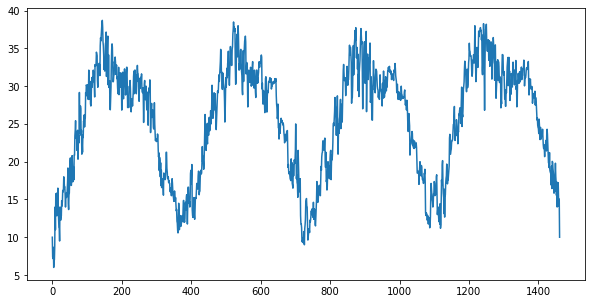

In [10]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(10,5))
df['meantemp'].plot(ax=ax)
plt.show()

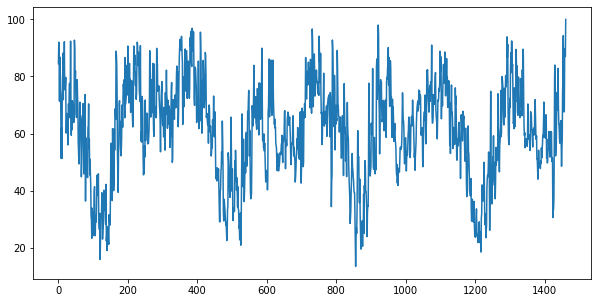

In [11]:
fig, ax = plt.subplots(figsize=(10,5))
df['humidity'].plot(ax=ax)
plt.show()

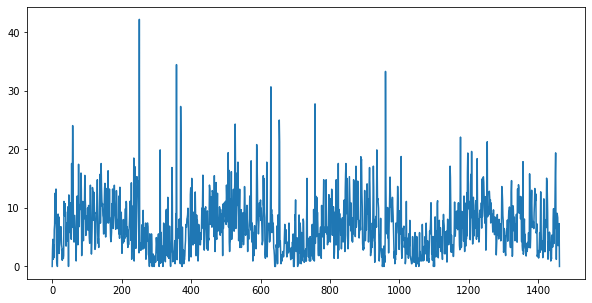

In [12]:
fig, ax = plt.subplots(figsize=(10,5))
df['wind_speed'].plot(ax=ax)
plt.show()

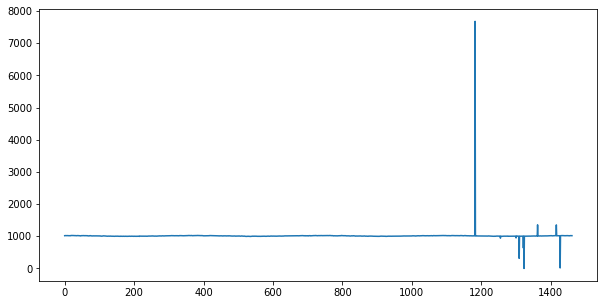

In [13]:
fig, ax = plt.subplots(figsize=(10,5))
df['meanpressure'].plot(ax=ax)
plt.show()

In [14]:
df["y"] = df["meantemp"]
df["ds"] = df["date"]

In [15]:
df = df.drop(["meantemp", "date"], 1)

<ipython-input-15-1bf0464856dc>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(["meantemp", "date"], 1)


In [16]:
df_test = df.iloc[len(df)-365:]
df_train = df.iloc[: len(df)-365]

In [17]:
df_train

,humidity,wind_speed,meanpressure,y,ds
0,84.500000,0.000000,1015.666667,10.000000,2013-01-01
1,92.000000,2.980000,1017.800000,7.400000,2013-01-02
2,87.000000,4.633333,1018.666667,7.166667,2013-01-03
3,71.333333,1.233333,1017.166667,8.666667,2013-01-04
4,86.833333,3.700000,1016.500000,6.000000,2013-01-05
...,...,...,...,...,...
1092,65.000000,7.412500,1018.125000,16.375000,2015-12-29
1093,71.750000,2.100000,1017.500000,15.500000,2015-12-30
1094,71.375000,2.087500,1020.500000,15.000000,2015-12-31
1095,72.285714,1.057143,1021.142857,14.714286,2016-01-01


In [18]:
!pip install pystan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.4/43.4 MB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 KB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 37.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 27.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 KB 5.8 MB/s eta 0:00:00


In [19]:
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
from prophet import Prophet
from sklearn.metrics import mean_squared_error

In [21]:
model = Prophet() 
model.fit(df_train) 

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7i1xpwrt/4f84_5qu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7i1xpwrt/624q2zgu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66439', 'data', 'file=/tmp/tmp7i1xpwrt/4f84_5qu.json', 'init=/tmp/tmp7i1xpwrt/624q2zgu.json', 'output', 'file=/tmp/tmp7i1xpwrt/prophet_model5tc4qq7p/prophet_model-20230326090137.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:01:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:01:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [22]:
future_data = model.make_future_dataframe(periods=365, freq = 'D')

In [23]:
forecast_data = model.predict(future_data)

In [24]:
forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2013-01-01,11.491475,8.978632,14.029571
1,2013-01-02,11.609242,9.026735,14.011745
2,2013-01-03,11.485315,8.750723,14.100809
3,2013-01-04,11.459843,8.895764,14.032182
4,2013-01-05,11.463823,8.883404,13.844199


In [25]:
forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1457,2016-12-28,12.535269,10.117362,15.079754
1458,2016-12-29,12.299528,9.831559,14.850367
1459,2016-12-30,12.169944,9.644283,14.763596
1460,2016-12-31,12.078433,9.559984,14.890134
1461,2017-01-01,11.952697,9.261690,14.643832


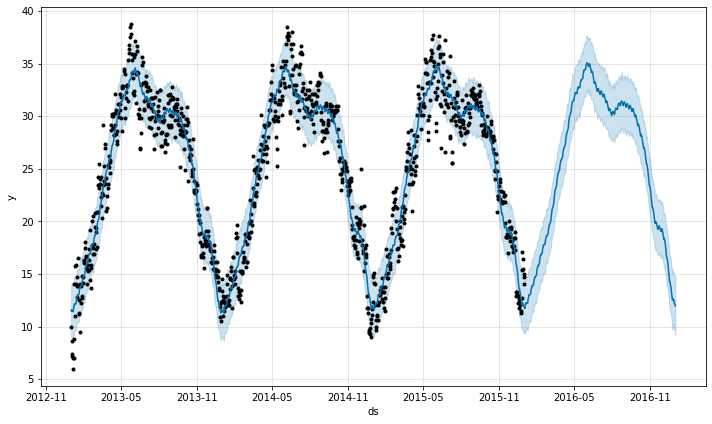

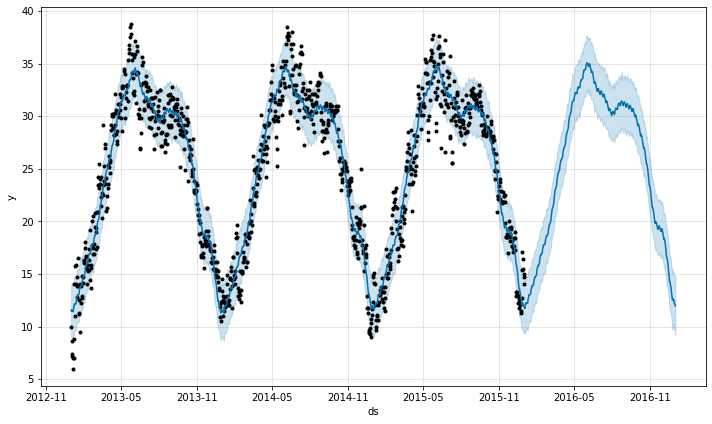

In [26]:
model.plot(forecast_data)

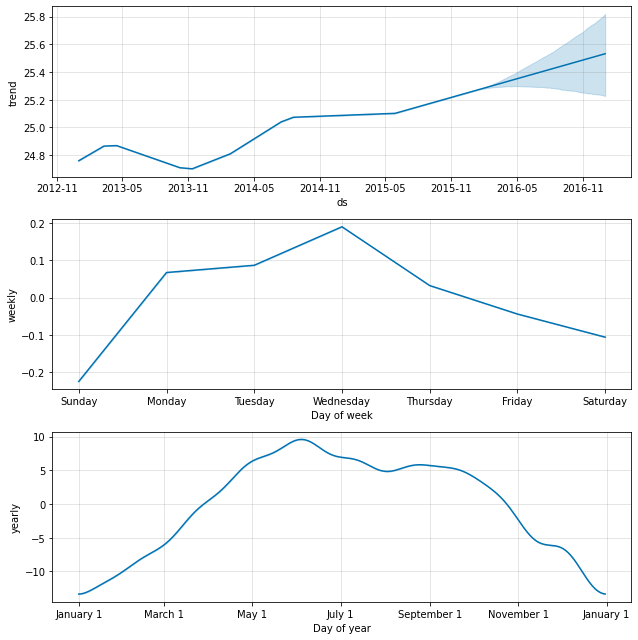

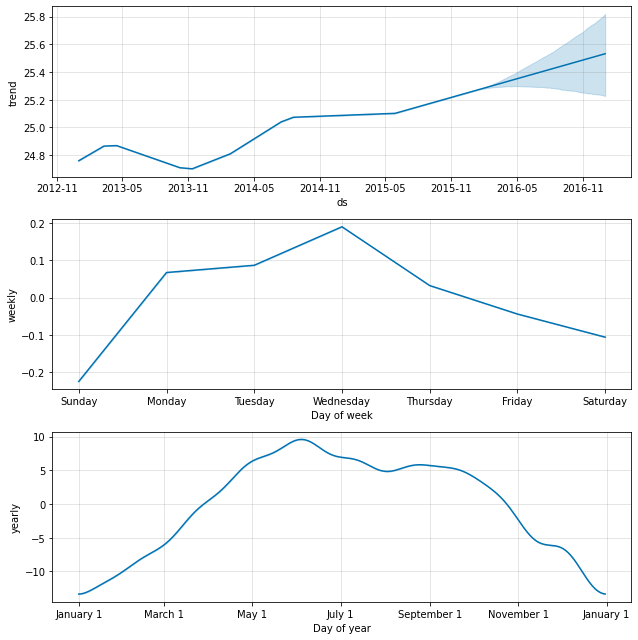

In [27]:
model.plot_components(forecast_data)

In [28]:
from statsmodels.tools.eval_measures import rmse

In [29]:
predictions = forecast_data.iloc[-365:]['yhat']

In [30]:
predictions

1097    11.703380
1098    12.032719
1099    12.106170
1100    12.278061
1101    12.201828
          ...    
1457    12.535269
1458    12.299528
1459    12.169944
1460    12.078433
1461    11.952697
Name: yhat, Length: 365, dtype: float64

In [31]:
df_test['y']

1097    14.375000
1098    15.750000
1099    15.833333
1100    17.375000
1101    17.125000
          ...    
1457    17.217391
1458    15.238095
1459    14.095238
1460    15.052632
1461    10.000000
Name: y, Length: 365, dtype: float64

In [32]:
print("RMSE of FbProphet:  5.8040661258463118")
print("Mean Val of meean_temp", df_test['y'].mean())

RMSE of FbProphet:  5.8040661258463118
Mean Val of meean_temp 27.12635682330706
